<a href="https://colab.research.google.com/github/phongphamn/nhan_dang/blob/master/FMDApproach1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pip3 install mtcnn

     |████████████████████████████████| 2.3MB 4.8MB/s 


In [ ]:
import cv2
from mtcnn import MTCNN
from google.colab.patches import cv2_imshow
import glob
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
images_path = glob.glob(r"/content/gdrive/My Drive/MaskDetector/Test Data 1/*.jpg")

In [ ]:
for i in range(len(images_path)):
  print(i, images_path[i])

0 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (14).jpg
1 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (18).jpg
2 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (17).jpg
3 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (4).jpg
4 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (3).jpg
5 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (11).jpg
6 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (10).jpg
7 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (16).jpg
8 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (8).jpg
9 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (20).jpg
10 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (9).jpg
11 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (6).jpg
12 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (12).jpg
13 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (5).jpg
14 /content/gdrive/My Drive/MaskDetector/Test Data 1/Image (7).j

In [ ]:
#Load designed labels of test data

label_face_input = []
label_mask_input = []

for i in range(len(images_path)):
  img = cv2.imread(images_path[i])
  height, width, channels = img.shape

  label_face = []
  label_mask = []

  file_name = os.path.basename(images_path[i]).split('.')[0]
  textfile_name = file_name + '.txt'
  txt = open(os.path.join("/content/gdrive/My Drive/MaskDetector/Test Data 1/", textfile_name), 'r')
  lines = txt.readlines()
  for line in lines:
    c, x, y, w, h = line.split()
    cls = int(c)
    centerX = int(float(x) * width)
    centerY = int(float(y) * height)
    ww = int(float(w) * width)
    hh = int(float(h) * height)
    xx = int(centerX - ww/2)
    yy = int(centerY - hh/2)

    if cls == 0:
      label_mask.append([xx, yy, ww, hh])
    else:
      if cls == 1:
        label_face.append([xx, yy, ww, hh])

  txt.close()
  label_face_input.append(label_face)
  label_mask_input.append(label_mask)

In [ ]:
#Check if two boxes are overlap
def isBoxesIntersect(box1, box2):
  x1, y1, w1, h1 = box1
  x2, y2, w2, h2 = box2

  if (x1 >= (x2 + w2) or x2 >= (x1 + w1)):
    return False

  if (y1 >= (y2 + h2) or y2 >= (y1+ h1)):
    return False

  return True

In [ ]:
#Calculate overlap area
def boxesSquareIntersect (box1, box2):
  x1, y1, w1, h1 = box1
  x2, y2, w2, h2 = box2

  dx = min([(x1+w1), (x2+w2)]) - max([(x1), (x2)])
  dy = min([(y1+h1), (y2+h2)]) - max([(y1), (y2)])

  result = 0
  if dx >= 0 and dy >= 0:
    result = dx*dy

  return result

In [ ]:
def boxSquare(box):
  x, y, w, h = box
  return h*w

In [ ]:
#Face detection stage / MTCNN stage
detector = MTCNN()

In [ ]:
# 2 var contain all boxes and arraykeys results from MTCNN

test_boxes_MTCNN = []
# Contain stage1 output's face bounding boxes
test_arraykey_MTCNN = []
# Contain stage1 output's face key values

for img_path in images_path:
  #Load image
  img = cv2.imread(img_path)
  #img = cv2.resize(img, None, fx=0.4, fy=0.4)
  height, width, channels = img.shape
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  #Detect faces in each image
  result = detector.detect_faces(img)

  arrayBounding = []
  arrayKey = []

  for i in range(len(result)):
    bounding_box = result[i]['box']
    arrayBounding.append(bounding_box)
    keypoints = result[i]['keypoints']
    arrayKey.append(keypoints)

  for i in range(len(arrayBounding)):
    cv2.rectangle(img, (arrayBounding[i][0], arrayBounding[i][1]), (arrayBounding[i][0] + arrayBounding[i][2], arrayBounding[i][1] + arrayBounding[i][3]), (0,155,255), 2)

  for i in range(len(arrayKey)):
    cv2.circle(img,(arrayKey[i]['left_eye']), 3, (0,155,255), 2)
    cv2.circle(img,(arrayKey[i]['right_eye']), 3, (0,155,255), 2)
    cv2.circle(img,(arrayKey[i]['nose']), 3, (0,155,255), 2)
    cv2.circle(img,(arrayKey[i]['mouth_left']), 3, (0,155,255), 2)
    cv2.circle(img,(arrayKey[i]['mouth_right']), 3, (0,155,255), 2)
  
  #Store all information in test folder
  test_boxes_MTCNN.append(arrayBounding)
  test_arraykey_MTCNN.append(arrayKey)
  
  #img_name = os.path.basename(img_path)
  #img_result_path = os.path.join("/content/gdrive/My Drive/MaskDetector/MTCNN results/", img_name)
  #cv2.imwrite(img_result_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
  

In [ ]:
# Extract correct boxes and key values

# 2 vars contain the correct bounding boxes found
correct_label_face_MTCNN = []
correct_keyvalue_MTCNN = []

for index in range(len(label_face_input)):
  correct_labels_in_image = []
  correct_keyvalues_in_image = []
  for i in range(len(label_face_input[index])):
    max_id = 0
    max_int_squ = 0
    for j in range(len(test_boxes_MTCNN[index])):
      intersect_square = boxesSquareIntersect(label_face_input[index][i], test_boxes_MTCNN[index][j])
      if (intersect_square > max_int_squ):
        max_int_squ = intersect_square
        max_id = j

    input_square = boxSquare(label_face_input[index][i])
    if max_int_squ > 0:
      if max_int_squ >= int(0.5 * input_square):
        if correct_labels_in_image.count(test_boxes_MTCNN[index][max_id]) == 0:
          correct_labels_in_image.append(test_boxes_MTCNN[index][max_id])
          correct_keyvalues_in_image.append(test_arraykey_MTCNN[index][max_id])

  correct_label_face_MTCNN.append(correct_labels_in_image)
  correct_keyvalue_MTCNN.append(correct_keyvalues_in_image)

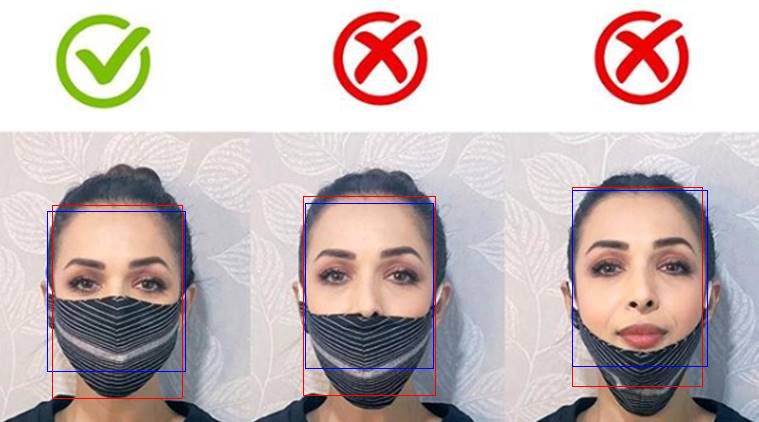

In [ ]:
# Show an example for MTCNN, with correct labels
id = 0
temp_img = cv2.imread(images_path[id])
for box in label_face_input[id]:
  x, y, w, h = box
  cv2.rectangle(temp_img, (x, y, w, h), (0,0,255))

for box in correct_label_face_MTCNN[id]:
  x, y, w, h = box
  cv2.rectangle(temp_img, (x, y, w, h), (255,0,0))

cv2_imshow(temp_img)

In [ ]:
# Evalueate stage1 output

# Recall and persision on each image
face_recalls = []
face_persisions = []

for index in range(len(label_face_input)):
  recall = len(correct_label_face_MTCNN[index]) / len(label_face_input[index])
  persision = len(correct_label_face_MTCNN[index]) / len(test_boxes_MTCNN[index])

  face_recalls.append(recall)
  face_persisions.append(persision)

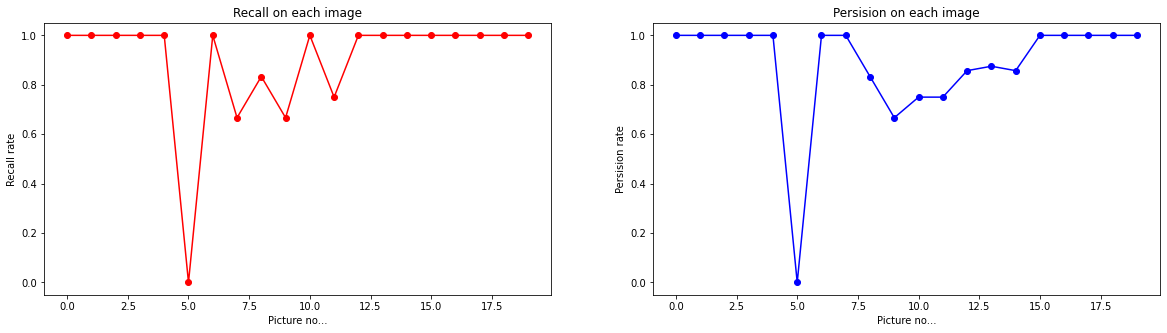

In [ ]:
# Draw plot of recall and persision
x_cod = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17, 18, 19]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(x_cod, face_recalls, 'ro-')
ax2.plot(x_cod, face_persisions, 'bo-')

ax1.set_title("Recall on each image")
ax2.set_title("Persision on each image")

ax1.set_xlabel("Picture no...")
ax1.set_ylabel("Recall rate")
ax2.set_xlabel("Picture no...")
ax2.set_ylabel("Persision rate")

plt.tight_layout
#fig.savefig("/content/gdrive/My Drive/MaskDetector/Plot images/Stage1 rap on images.png")
plt.show()

In [ ]:
# Recall of stage1

correct_face_labels = 0
number_face_labels = 0
for index in range(len(correct_label_face_MTCNN)):
  correct_face_labels+=len(correct_label_face_MTCNN[index])
  number_face_labels+=len(label_face_input[index])

face_recall_all = correct_face_labels/number_face_labels
print("Total recall of test data =", face_recall_all)

Total recall of test data = 0.9


In [ ]:
# Persision of stage1

correct_face_labels = 0
number_face_labels = 0
for index in range(len(correct_label_face_MTCNN)):
  correct_face_labels+=len(correct_label_face_MTCNN[index])
  number_face_labels+=len(test_boxes_MTCNN[index])

face_persision_all = correct_face_labels/number_face_labels
print("Total persision of test data =", face_persision_all)

Total persision of test data = 0.863013698630137


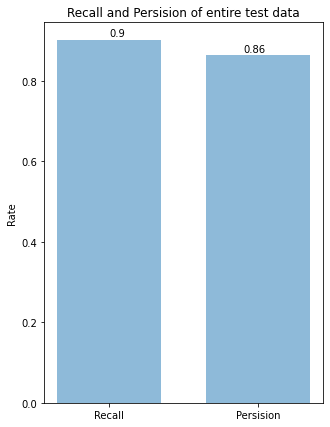

In [ ]:
objects = ("Recall", "Persision")
y_pos = np.arange(len(objects))
rate = [face_recall_all, face_persision_all]
plt.figure(figsize=(5, 7))
plt.bar(y_pos, rate, width=0.7, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Rate')
plt.title('Recall and Persision of entire test data')
plt.text(0, 0.91, str(face_recall_all))
plt.text(0.9, 0.87, str(round(face_persision_all, 2)))
#plt.savefig("/content/gdrive/My Drive/MaskDetector/Plot images/Stage1 rap all.png")
plt.show()

In [ ]:
# Finish Face detection stage (stage 1)
# Move to Mask detection stage with yolov3 (stage 2)
# Mask detection approach 1: Detect mask on original test images
# Mask detection approach 2: Detect mask on boxes, which are the correct outputs of stage 1

In [ ]:
# Mask detection stage / Yolov3 stage
# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/My Drive/MaskDetector/YoloV3Data/yolov3_custom_last.weights", "/content/gdrive/My Drive/MaskDetector/YoloV3Data/yolov3_custom.cfg")
# Name custom object
classes = ["Face mask"]

In [ ]:
# Yolo approach 1: detect mask on test images
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

#test_boxes_yolo_1 = []
#test_confidences_yolo_1 = []

# loop through all the images
for img_path in images_path:
    
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.6:
                # Object detected
                #print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    #indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    #print(indexes)

    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
      x, y, w, h = boxes[i]
      label = str(classes[class_ids[i]])
      con = confidences[i]
      color = colors[class_ids[i]]
      cv2.rectangle(img, (x, y, w, h), color, 2)
      cv2.putText(img, str(con), (x, y - 2), font, 1, color, 1)

    #img_name = os.path.basename(img_path)
    #img_result_path = os.path.join("/content/gdrive/My Drive/MaskDetector/YRA1/YoloResultAt60/", img_name)
    #cv2.imwrite(img_result_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    #txt_name = img_name.split('.')[0] + ".txt"
    #txt_result_path = os.path.join("/content/gdrive/My Drive/MaskDetector/YRA1/YoloResultAt60/", txt_name)
    #f = open(txt_result_path, "w+")
    #for i in range(len(boxes)):
      #f.write(str(boxes[i][0]) + " " + str(boxes[i][1]) + " " + str(boxes[i][2]) + " " + str(boxes[i][3])  + "\n")

    #f.close()

    #test_boxes_yolo_1.append(boxes)
    #test_confidences_yolo_1.append(confidences)

In [ ]:
#Define a fuction to read yolo predicted labels
def readYoloTestLabel(dir, names):
  all_labels = []
  label_paths = []
  for n in names:
    label_paths.append(os.path.join(dir, n))

  for path in label_paths:
    labels = []
    f = open(path, "r")
    lines = f.readlines()
    for line in lines:
      x, y, w, h = line.split()
      xx = int(x)
      yy = int(y)
      ww = int(w)
      hh = int(h)

      labels.append([xx, yy, ww, hh])

    all_labels.append(labels)
    f.close()

  return all_labels

In [ ]:
# Read predicted labels from directories

directory10 = "/content/gdrive/My Drive/MaskDetector/YRA1/YoloResultAt10/"
directory30 = "/content/gdrive/My Drive/MaskDetector/YRA1/YoloResultAt30/"
directory60 = "/content/gdrive/My Drive/MaskDetector/YRA1/YoloResultAt60/"
directory70 = "/content/gdrive/My Drive/MaskDetector/YRA1/YoloResultAt70/"
directory80 = "/content/gdrive/My Drive/MaskDetector/YRA1/YoloResultAt80/"

prediect_txt_names = []
for path in images_path:
  name = os.path.basename(path).split('.')[0] + ".txt"
  prediect_txt_names.append(name)

predicted_labels_10 = readYoloTestLabel(directory10, prediect_txt_names)
predicted_labels_30 = readYoloTestLabel(directory30, prediect_txt_names)
predicted_labels_60 = readYoloTestLabel(directory60, prediect_txt_names)
predicted_labels_70 = readYoloTestLabel(directory70, prediect_txt_names)
predicted_labels_80 = readYoloTestLabel(directory80, prediect_txt_names)

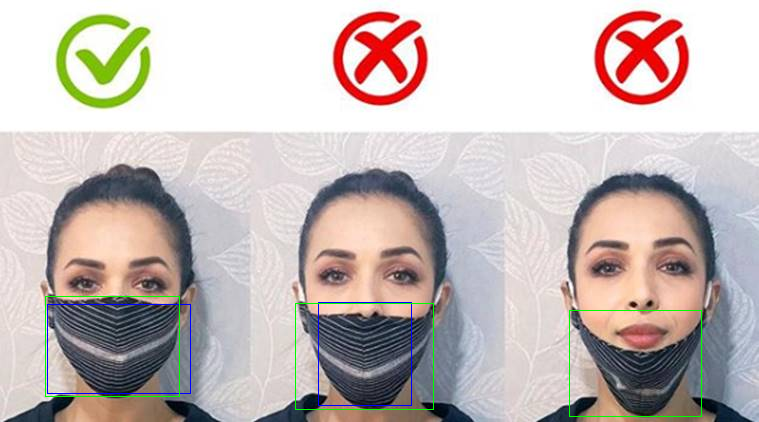

In [ ]:
# Show an example for Yolov3
id = 0
temp_img = cv2.imread(images_path[id])
for i in range(len(predicted_labels_60[id])):
  x, y, w, h = predicted_labels_60[id][i]
  cv2.rectangle(temp_img, (x, y, w, h), (255,0,0))

for i in range(len(label_mask_input[id])):
  lx, ly, lw, lh = label_mask_input[id][i]
  cv2.rectangle(temp_img, (lx,ly,lw,lh), (0,255,0))

cv2_imshow(temp_img)

In [ ]:
# Define Reduce redundant labels function

def reduceRedundantLabels(all_labels):
  new_all_labels = []
  for labels in all_labels:
    new_labels = []
    for i in range(len(labels)):
      redundant = 0
      for j in range(i+1, len(labels)):
        if boxesSquareIntersect(labels[i], labels[j]) > 0:
          if ( boxesSquareIntersect(labels[i], labels[j]) >= 0.8 * ((boxSquare(labels[i]) + boxSquare(labels[j])) / 2) ):
            redundant+=1
        
      if redundant == 0:
        new_labels.append(labels[i])
        
    new_all_labels.append(new_labels)

  return new_all_labels

In [ ]:
# Reduce redundant labels

new_predicted_labels_10 = reduceRedundantLabels(predicted_labels_10)
new_predicted_labels_30 = reduceRedundantLabels(predicted_labels_30)
new_predicted_labels_60 = reduceRedundantLabels(predicted_labels_60)
new_predicted_labels_70 = reduceRedundantLabels(predicted_labels_70)
new_predicted_labels_80 = reduceRedundantLabels(predicted_labels_80)

In [ ]:
# Take percise predicted labels
def perciseMaskLabels(predict_labels, input_labels):
  all_percise_labels=[]

  for index in range(len(input_labels)):
    percise_labels = []
    for i in range(len(input_labels[index])):
      max_id = 0
      max_int_squ = 0
      for j in range(len(predict_labels[index])):
        intersect_square = boxesSquareIntersect(input_labels[index][i], predict_labels[index][j])
        if (intersect_square > max_int_squ):
          max_int_squ = intersect_square
          max_id = j

      input_square = boxSquare(input_labels[index][i])
      if max_int_squ > 0:
        if max_int_squ >= int(0.5 * input_square):
          if percise_labels.count(predict_labels[index][max_id]) == 0:
            percise_labels.append(predict_labels[index][max_id])

    all_percise_labels.append(percise_labels)

  return all_percise_labels

In [ ]:
# Extract persice predicted mask labels at a specific rate
mask_percise_label_at10 = perciseMaskLabels(new_predicted_labels_10, label_mask_input)
mask_percise_label_at30 = perciseMaskLabels(new_predicted_labels_30, label_mask_input)
mask_percise_label_at60 = perciseMaskLabels(new_predicted_labels_60, label_mask_input)
mask_percise_label_at70 = perciseMaskLabels(new_predicted_labels_70, label_mask_input)
mask_percise_label_at80 = perciseMaskLabels(new_predicted_labels_80, label_mask_input)

In [ ]:
# Evaluate yolo output

In [ ]:
# Define a function that calculates perssision on each image
def measurementEachImage(persise_labels, predict_labels):
  persisions = []
  for index in range(len(persise_labels)):
    presision = 0
    if len(predict_labels[index]) != 0:
      persision = len(persise_labels[index])/ len(predict_labels[index])
    
    persisions.append(persision)

  return persisions

In [ ]:
# Define a function that calcuate mask recall in all data test at specific prediction confidence
def measurementAll(persise_labels, input_labels):
  recall = 0
  n_pl = 0
  n_il = 0
  for index in range(len(input_labels)):
    n_pl+=len(persise_labels[index])
    n_il+=len(input_labels[index])

  recall = n_pl/n_il
  return recall

In [ ]:
mask_recalls_at10 = measurementEachImage(mask_percise_label_at10, label_mask_input)
mask_recalls_at30 = measurementEachImage(mask_percise_label_at30, label_mask_input)
mask_recalls_at60 = measurementEachImage(mask_percise_label_at60, label_mask_input)
mask_recalls_at70 = measurementEachImage(mask_percise_label_at70, label_mask_input)
mask_recalls_at80 = measurementEachImage(mask_percise_label_at80, label_mask_input)

In [ ]:
mask_presisions_at10 = measurementEachImage(mask_percise_label_at10, predicted_labels_10)
mask_presisions_at30 = measurementEachImage(mask_percise_label_at30, predicted_labels_30)
mask_presisions_at60 = measurementEachImage(mask_percise_label_at60, predicted_labels_60)
mask_presisions_at70 = measurementEachImage(mask_percise_label_at70, predicted_labels_70)
mask_presisions_at80 = measurementEachImage(mask_percise_label_at80, predicted_labels_80)

In [ ]:
print(mask_presisions_at80)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


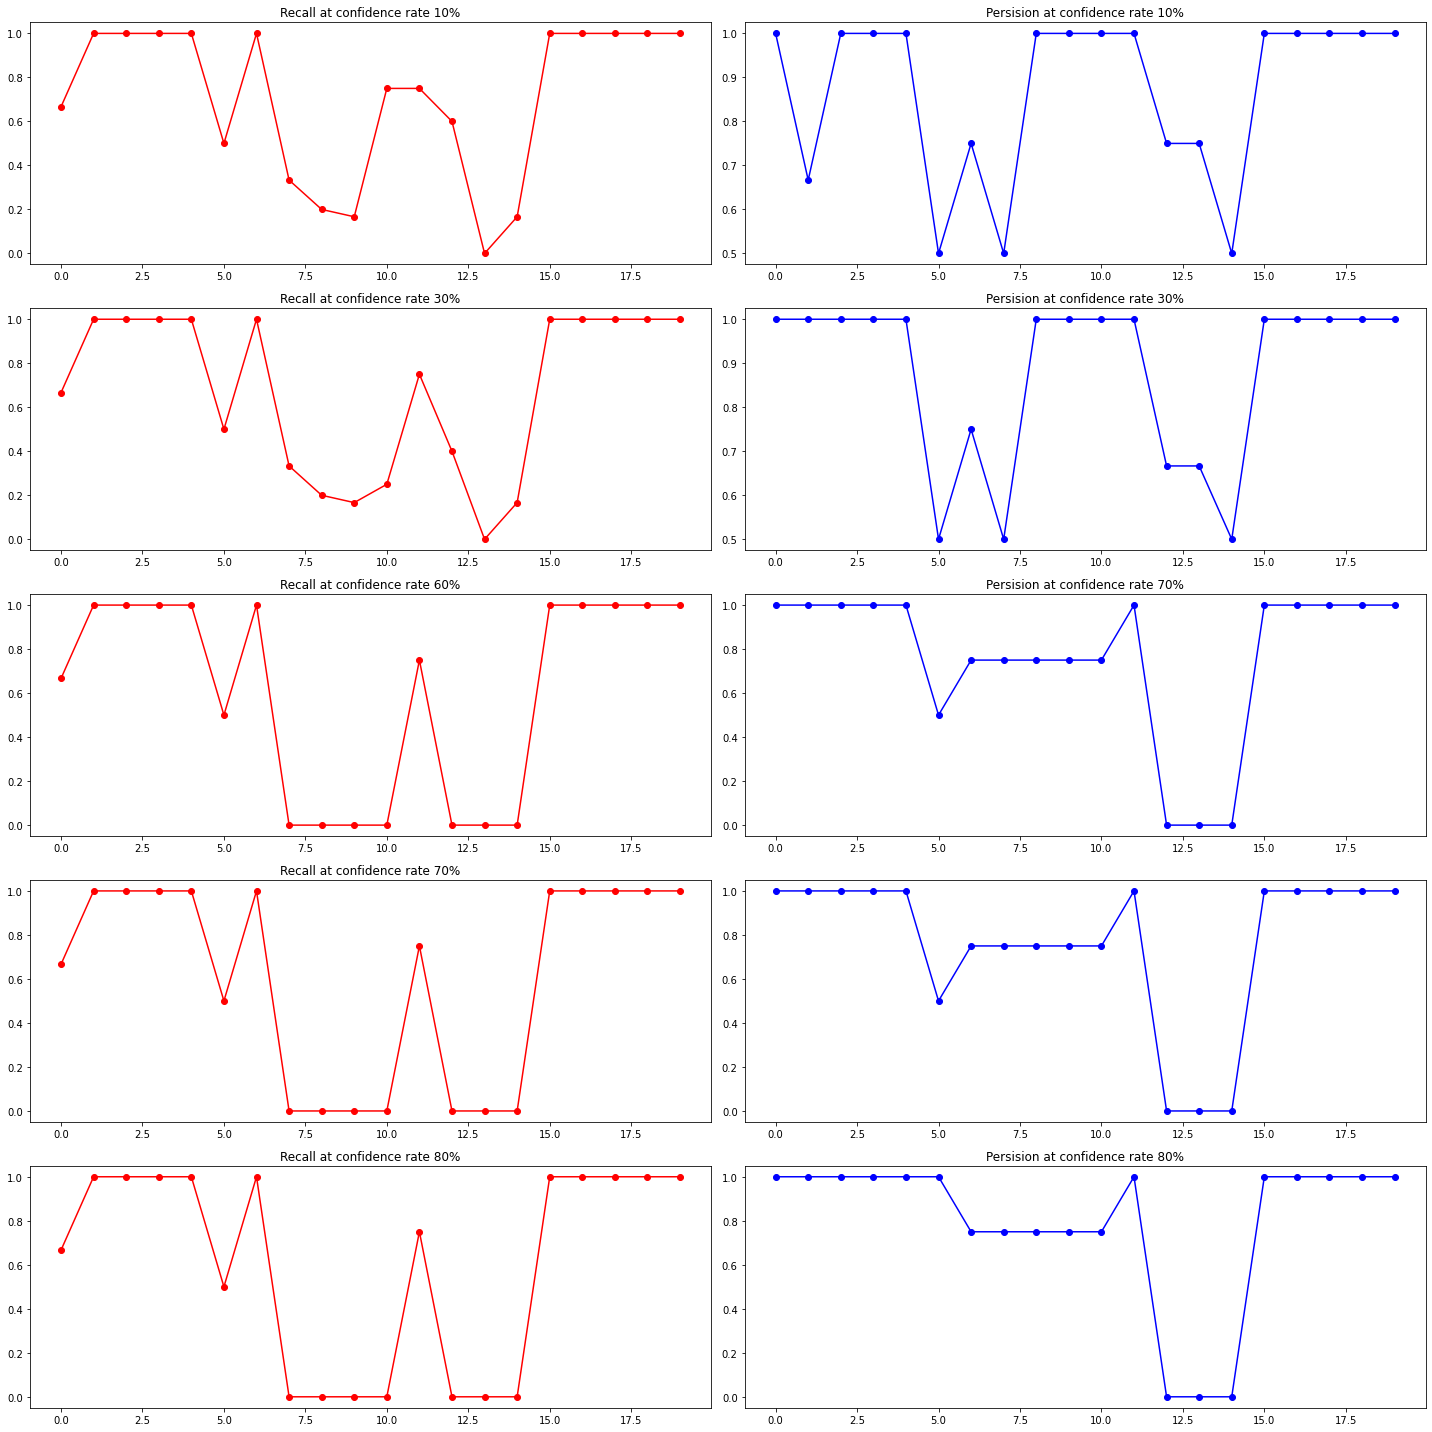

In [ ]:
# Show recalls at some confidence rate
x_cod = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17, 18, 19]
fig, ax = plt.subplots(5, 2, figsize = (20, 20))
ax[0, 0].plot(x_cod, mask_recalls_at10, '-ro')
ax[0, 1].plot(x_cod, mask_presisions_at10, '-bo')
ax[1, 0].plot(x_cod, mask_recalls_at30, '-ro')
ax[1, 1].plot(x_cod, mask_presisions_at30, '-bo')
ax[2, 0].plot(x_cod, mask_recalls_at60, '-ro')
ax[2, 1].plot(x_cod, mask_presisions_at60, '-bo')
ax[3, 0].plot(x_cod, mask_recalls_at70, '-ro')
ax[3, 1].plot(x_cod, mask_presisions_at70, '-bo')
ax[4, 0].plot(x_cod, mask_recalls_at80, '-ro')
ax[4, 1].plot(x_cod, mask_presisions_at80, '-bo')

ax[0, 0].set_title("Recall at confidence rate 10%")
ax[0, 1].set_title("Persision at confidence rate 10%")
ax[1, 0].set_title("Recall at confidence rate 30%")
ax[1, 1].set_title("Persision at confidence rate 30%")
ax[2, 0].set_title("Recall at confidence rate 60%")
ax[2, 1].set_title("Persision at confidence rate 60%")
ax[3, 0].set_title("Recall at confidence rate 70%")
ax[3, 1].set_title("Persision at confidence rate 70%")
ax[4, 0].set_title("Recall at confidence rate 80%")
ax[4, 1].set_title("Persision at confidence rate 80%")

plt.tight_layout()
#plt.savefig("/content/gdrive/My Drive/MaskDetector/Plot images/Stage2 rap images.png")
plt.show()

In [ ]:
recall_all_at10 = measurementAll(mask_percise_label_at10, label_mask_input)
recall_all_at30 = measurementAll(mask_percise_label_at30, label_mask_input)
recall_all_at60 = measurementAll(mask_percise_label_at60, label_mask_input)
recall_all_at70 = measurementAll(mask_percise_label_at70, label_mask_input)
recall_all_at80 = measurementAll(mask_percise_label_at80, label_mask_input)

print("Recall at confidence rate 10% =", recall_all_at10)
print("Recall at confidence rate 30% =", recall_all_at30)
print("Recall at confidence rate 60% =", recall_all_at60)
print("Recall at confidence rate 70% =", recall_all_at70)
print("Recall at confidence rate 80% =", recall_all_at80)

Recall at confidence rate 10% = 0.5873015873015873
Recall at confidence rate 30% = 0.5396825396825397
Recall at confidence rate 60% = 0.42857142857142855
Recall at confidence rate 70% = 0.42857142857142855
Recall at confidence rate 80% = 0.42857142857142855


In [ ]:
percise_all_at10 = measurementAll(mask_percise_label_at10, predicted_labels_10)
percise_all_at30 = measurementAll(mask_percise_label_at30, predicted_labels_30)
percise_all_at60 = measurementAll(mask_percise_label_at60, predicted_labels_60)
percise_all_at70 = measurementAll(mask_percise_label_at70, predicted_labels_70)
percise_all_at80 = measurementAll(mask_percise_label_at80, predicted_labels_80)

print("Persision at confidence rate 10% =", percise_all_at10)
print("Persision at confidence rate 30% =", percise_all_at30)
print("Persision at confidence rate 60% =", percise_all_at60)
print("Persision at confidence rate 70% =", percise_all_at70)
print("Persision at confidence rate 80% =", percise_all_at80)

Persision at confidence rate 10% = 0.8604651162790697
Persision at confidence rate 30% = 0.8717948717948718
Persision at confidence rate 60% = 0.9
Persision at confidence rate 70% = 0.9
Persision at confidence rate 80% = 0.9310344827586207


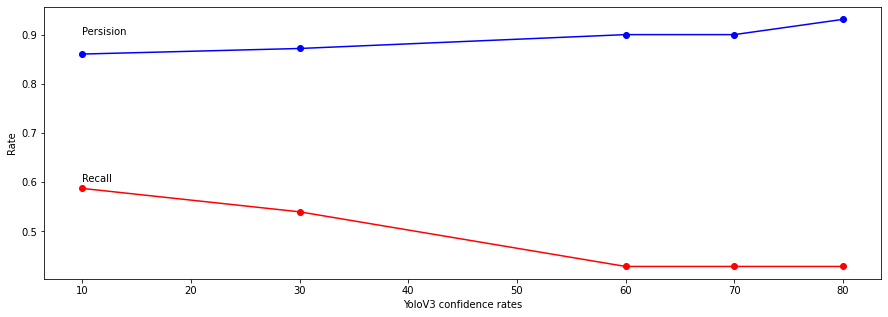

In [ ]:
x_cod = [10, 30, 60, 70, 80]
plt.figure(figsize=(15,5))
plt.plot(x_cod, [recall_all_at10, recall_all_at30, recall_all_at60, recall_all_at70, recall_all_at80], '-ro')
plt.plot(x_cod, [percise_all_at10, percise_all_at30, percise_all_at60, percise_all_at70, percise_all_at80], '-bo')
plt.text(10, 0.6,"Recall", )
plt.text(10, 0.9,"Persision", )
plt.xlabel("YoloV3 confidence rates")
plt.ylabel("Rate")
#plt.savefig("/content/gdrive/My Drive/MaskDetector/Plot images/Stage2 rap all.png")
plt.show()

In [ ]:
# Stage3: classification which faces has mask on

In [ ]:
# Define a function to check whether a point is inside a rectangle

def isPointInRect(rect, point):
  rx, ry, w, h = rect
  px, py = point

  if px >= rx and px <= (rx + w) and py >= ry and py <= (ry + h):
    return True
  else:
    return False

In [ ]:
# Define a function that matching face labels with mask labels
def classifyFaces(face_labels, face_keyvalues, mask_labels):
  face_indexes = []
  mask_arr_indexes = []
  for img_index in range(len(face_labels)):
    face_index = []
    mask_array = []
    for i in range(len(face_labels[img_index])):
      if len(face_labels[img_index][i]) > 0:
        mouth_left = [face_keyvalues[img_index][i]['mouth_left'][0], face_keyvalues[img_index][i]['mouth_left'][1]]
        mouth_right = [face_keyvalues[img_index][i]['mouth_right'][0], face_keyvalues[img_index][i]['mouth_right'][1]]
        mouth_right = [face_keyvalues[img_index][i]['mouth_right'][0], face_keyvalues[img_index][i]['mouth_right'][1]]
        mask_ids = []
        for j in range(len(mask_labels[img_index])):
          if isPointInRect(mask_labels[img_index][j], mouth_left) and isPointInRect(mask_labels[img_index][j], mouth_right) and isPointInRect(mask_labels[img_index][j], mouth_right):
            mask_ids.append(j)

        face_index.append(i)
        mask_array.append(mask_ids)
      else:
        face_index.append(i)
        mask_array.append([])

    face_indexes.append(face_index)
    mask_arr_indexes.append(mask_array)

  return face_indexes, mask_arr_indexes

In [ ]:
# Labels matching result, with correct stage1 labels and stage2 labels at 60
predict_face_indexes, predict_mask_arr_indexes = classifyFaces(correct_label_face_MTCNN, correct_keyvalue_MTCNN, new_predicted_labels_60)

In [ ]:
# Write result into folder
stage3_result_dir = "/content/gdrive/My Drive/MaskDetector/Results/Approach1/"
for index_img in range(len(images_path)):
  img = cv2.imread(images_path[index_img])
  for index_face in range(len(predict_face_indexes[index_img])):
    number_mask_label = len(predict_mask_arr_indexes[index_img][index_face])
    if number_mask_label > 0:
      cv2.rectangle(img, correct_label_face_MTCNN[index_img][index_face], (255, 0, 0), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['left_eye'], 3, (255, 0, 0), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['right_eye'], 3, (255, 0, 0), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['nose'], 3, (255, 0, 0), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['mouth_left'], 3, (255, 0, 0), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['mouth_right'], 3, (255, 0, 0), 2)

      mask_array = predict_mask_arr_indexes[index_img][index_face]
      for j in mask_array:
        cv2.rectangle(img, new_predicted_labels_60[index_img][j], (0, 255, 0))

    else:
      cv2.rectangle(img, correct_label_face_MTCNN[index_img][index_face], (0 , 0, 255), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['left_eye'], 3, (0 , 0, 255), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['right_eye'], 3, (0 , 0, 255), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['nose'], 3, (0 , 0, 255) ,2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['mouth_left'], 3, (0 , 0, 255), 2)
      cv2.circle(img, correct_keyvalue_MTCNN[index_img][index_face]['mouth_right'], 3, (0 , 0, 255), 2)

  cv2.imwrite(os.path.join(stage3_result_dir, os.path.basename(images_path[index_img])), img)

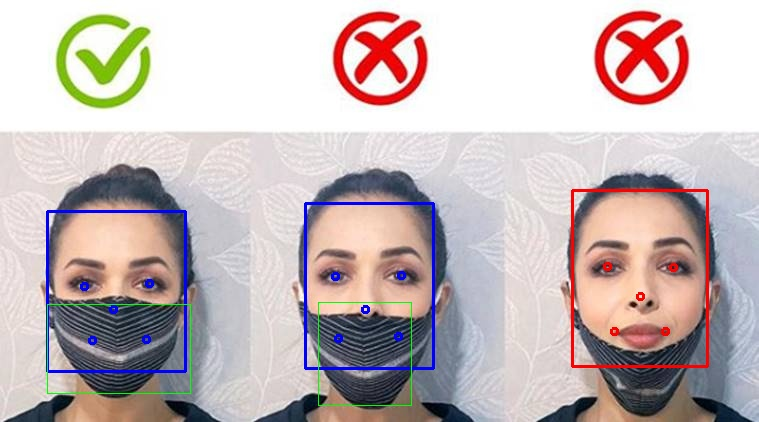

In [ ]:
# Show a stage3 result
img = cv2.imread(os.path.join(stage3_result_dir, "Image (14).jpg"))
cv2_imshow(img)

In [ ]:
# Load number of face with mask from designed labels
num_pair_image = []
num_pair_all = 0
for index in range(len(label_face_input)):
  n = min(len(label_face_input[index]), len(label_mask_input[index]))
  num_pair_image.append(n)
  num_pair_all+=n

In [ ]:
# Load number of correct pair
correct_pairs = []
correct_pairs_all = 0
for index in range(len(predict_face_indexes)):
  n = 0
  for i in range(len(predict_face_indexes[index])):
    if len(predict_mask_arr_indexes[index][i]) > 0:
      n+=1
  
  correct_pairs.append(n)
  correct_pairs_all+=n

In [ ]:
# Calculate recall
recall_image = []
recall_all = 0

for i in range(len(num_pair_image)):
  n = correct_pairs[i] / num_pair_image[i]
  recall_image.append(n)

recall_all = correct_pairs_all / num_pair_all

In [ ]:
print(recall_image)
print(recall_all)

[0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.4126984126984127


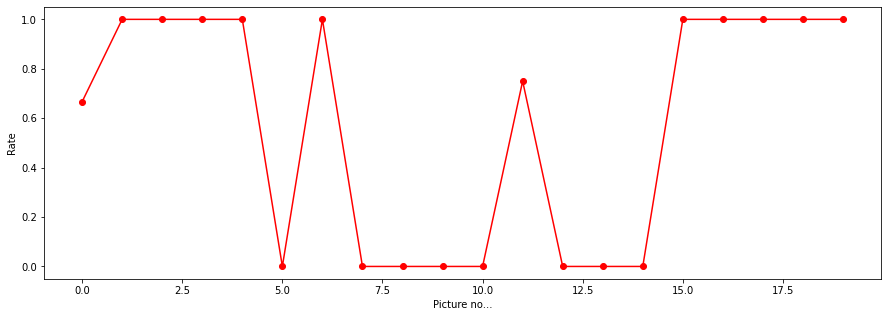

In [ ]:
x_cod = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17, 18, 19]
plt.figure(figsize=(15,5))
plt.plot(x_cod, recall_image, '-ro')
plt.xlabel("Picture no...")
plt.ylabel("Rate")
#plt.savefig("/content/gdrive/My Drive/MaskDetector/Plot images/Stage3 recall images.png")
plt.show()

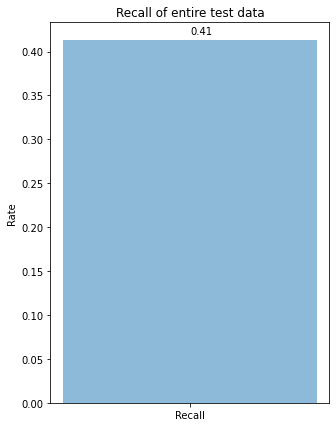

In [ ]:
y_pos = [0]
rate = [recall_all]
plt.figure(figsize=(5, 7))
plt.bar(y_pos, rate, align='center', alpha=0.5)
plt.xticks(y_pos, ["Recall"])
plt.ylabel('Rate')
plt.title('Recall of entire test data')
plt.text(0, 0.42, str(round(recall_all, 2)))
#plt.savefig("/content/gdrive/My Drive/MaskDetector/Plot images/Stage3 recall all.png")
plt.show()